In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the CSV file
csv_path = 'gfp_intensity_results.csv'
df = pd.read_csv(csv_path)

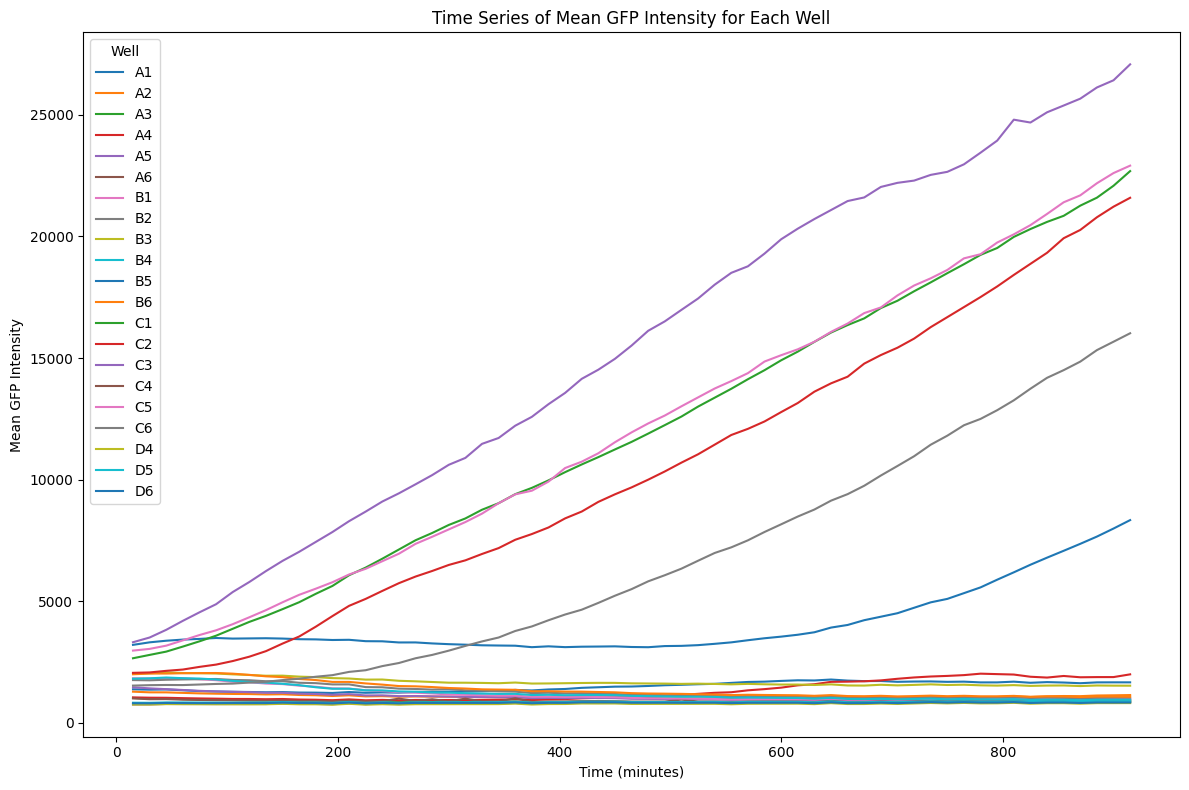

In [3]:
# Create a 'Time' column based on the order of images (15 minutes apart)
# Assuming that the Identifier uniquely identifies the well and image number is sequential
# Extract well info and image number if available
df['Well'] = df['Identifier'].str.extract(r'([A-D]\d+)')
df['Image_Number'] = df['Identifier'].str.extract(r'_(\d+)$').astype(int)

# Sort by well and image number to ensure proper time series order
df = df.sort_values(by=['Well', 'Image_Number'])

# Add the Time column: each image is taken 15 minutes apart
df['Time'] = df['Image_Number'] * 15  # Time in minutes

# Plot the time series for each well
wells = df['Well'].unique()
plt.figure(figsize=(12, 8))

for well in wells:
    well_data = df[df['Well'] == well]
    plt.plot(well_data['Time'], well_data['Mean_GFP_Intensity'], label=well)

# Customize the plot
plt.xlabel('Time (minutes)')
plt.ylabel('Mean GFP Intensity')
plt.title('Time Series of Mean GFP Intensity for Each Well')
plt.legend(title="Well")
plt.tight_layout()
plt.show()

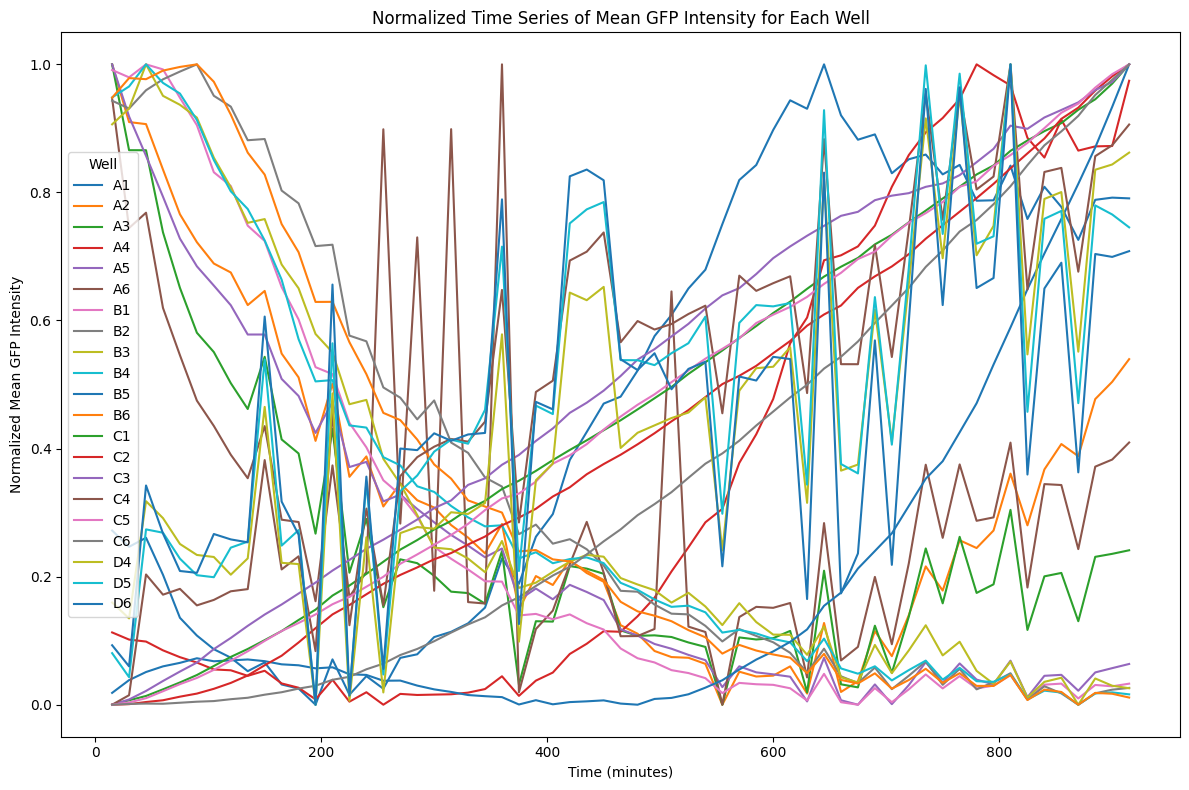

In [4]:
# Extract well information and image number for each Identifier
df['Well'] = df['Identifier'].str.extract(r'([A-D]\d+)')
df['Image_Number'] = df['Identifier'].str.extract(r'_(\d+)$').astype(int)

# Sort by well and image number to ensure proper time series order
df = df.sort_values(by=['Well', 'Image_Number'])

# Add the Time column (15 minutes apart)
df['Time'] = df['Image_Number'] * 15  # Time in minutes

# Min-max normalization by well
df['Normalized_Mean_GFP_Intensity'] = df.groupby('Well')['Mean_GFP_Intensity'].transform(
    lambda x: (x - x.min()) / (x.max() - x.min())
)

# Plot the normalized time series for each well
wells = df['Well'].unique()
plt.figure(figsize=(12, 8))

for well in wells:
    well_data = df[df['Well'] == well]
    plt.plot(well_data['Time'], well_data['Normalized_Mean_GFP_Intensity'], label=well)

# Customize the plot
plt.xlabel('Time (minutes)')
plt.ylabel('Normalized Mean GFP Intensity')
plt.title('Normalized Time Series of Mean GFP Intensity for Each Well')
plt.legend(title="Well")
plt.tight_layout()
plt.show()

In [5]:
# Load the CSV file
csv_path = 'gfp_intensity_results_batch1.csv'  # Replace with your actual file path
df = pd.read_csv(csv_path)

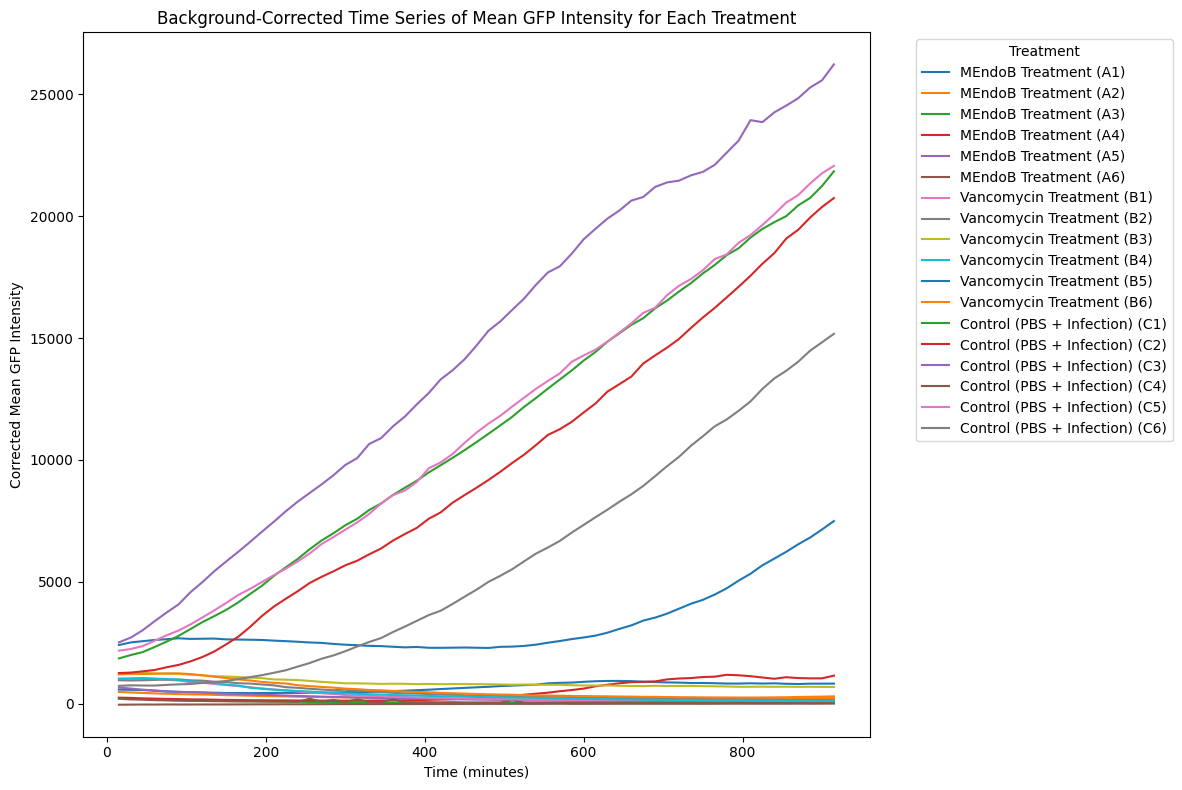

: 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
csv_path = 'gfp_intensity_results.csv'  # Replace with your actual file path
df = pd.read_csv(csv_path)

# Extract well information and image number for each Identifier
df['Well'] = df['Identifier'].str.extract(r'([A-D]\d+)')
df['Image_Number'] = df['Identifier'].str.extract(r'_(\d+)$').astype(int)

# Sort by well and image number to ensure proper time series order
df = df.sort_values(by=['Well', 'Image_Number'])

# Add the Time column (15 minutes apart)
df['Time'] = df['Image_Number'] * 15  # Time in minutes

# Map wells to treatment groups
def map_treatment(well):
    if well.startswith("A"):
        return "MEndoB Treatment"
    elif well.startswith("B"):
        return "Vancomycin Treatment"
    elif well.startswith("C"):
        return "Control (PBS + Infection)"
    elif well.startswith("D"):
        return "Blank (No Infection)"
    return "Unknown"

# Apply treatment mapping to create a new 'Treatment' column
df['Treatment'] = df['Well'].apply(map_treatment)

# Calculate the mean GFP intensity of the blank wells (Well D) at each time point
blank_values = df[df['Treatment'] == "Blank (No Infection)"].groupby('Time')['Mean_GFP_Intensity'].mean().rename("Blank_GFP_Intensity")

# Merge the blank values back into the original dataframe based on Time
df = df.merge(blank_values, on='Time')

# Subtract the blank intensity from each well's GFP intensity (background correction)
df['Corrected_Mean_GFP_Intensity'] = df['Mean_GFP_Intensity'] - df['Blank_GFP_Intensity']

# Plot the corrected time series for each treatment group (excluding blanks)
treatments = df['Treatment'].unique()
plt.figure(figsize=(12, 8))

for treatment in treatments:
    if treatment == "Blank (No Infection)":
        continue  # Skip the blank wells in the plot
    treatment_data = df[df['Treatment'] == treatment]
    for well in treatment_data['Well'].unique():
        well_data = treatment_data[treatment_data['Well'] == well]
        plt.plot(well_data['Time'], well_data['Corrected_Mean_GFP_Intensity'], label=f"{treatment} ({well})")

# Customize the plot
plt.xlabel('Time (minutes)')
plt.ylabel('Corrected Mean GFP Intensity')
plt.title('Background-Corrected Time Series of Mean GFP Intensity for Each Treatment')
plt.legend(title="Treatment", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
